In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde 

import sys
sys.path.append('./src')

from diagram_estimations import draw_mm_diagrams, draw_mle_diagrams, draw_ls_diagrams, draw_hist_kde

df = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]
df_sampled = df[(df.loc[:, weather_columns] != -1).all(axis=1) & (df.loc[:, weather_columns] != 0).all(axis=1)]

property = 'fire_size'

s_c = 'ALL'

kernel = gaussian_kde(df_sampled[property])
min_amount, max_amount = df_sampled[property].min(), df_sampled[property].max()

print(f'min value: {min_amount}; max value: {max_amount}')

min value: 0.51; max value: 517078.0


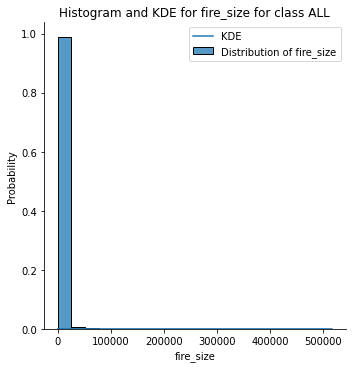

In [8]:
x = np.linspace(0, max_amount, num=50)
kde_values = kernel(x)

draw_hist_kde(df_sampled, x, s_c, property, kde_values, 20)

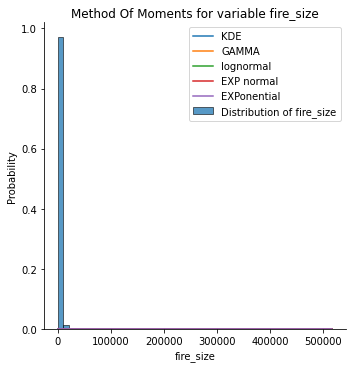

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.6763137360566696, pvalue=3.6809732565265217e-23), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=5.720993334397145, pvalue=6.466474022914781e-10)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.5863182911373743, pvalue=7.018096561872667e-17), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=4.539209031173155, pvalue=0)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.5866439548946247, pvalue=6.699478894963865e-17), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=4.542025407641949, pvalue=0)


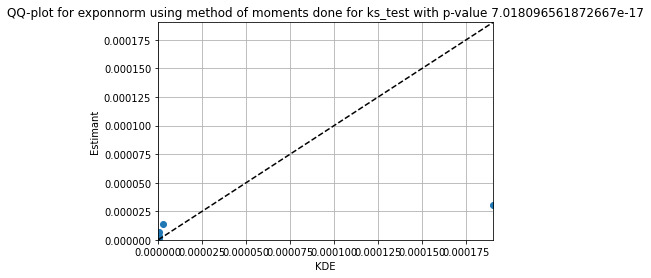

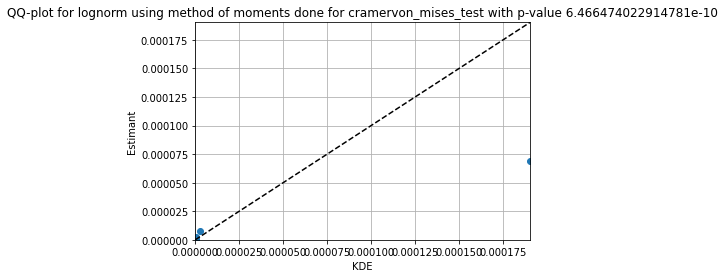

In [9]:
draw_mm_diagrams(df_sampled, x, s_c, property, kde_values, 50)

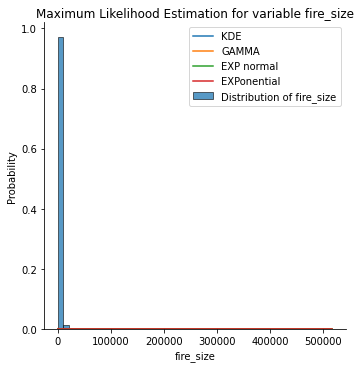

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9994411700555164, pvalue=4.623953586588541e-163), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.638746633492367, pvalue=5.064877406368851e-10)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)


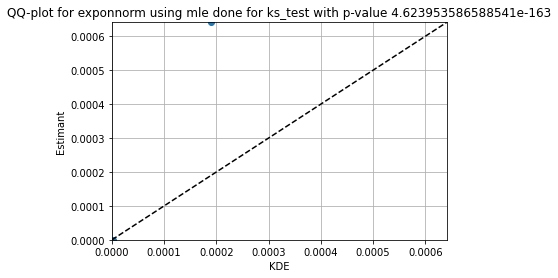

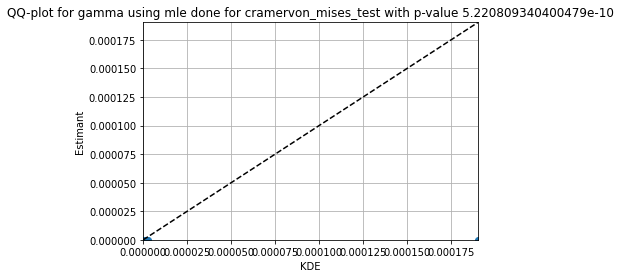

In [10]:
draw_mle_diagrams(df_sampled, x, s_c, property, kde_values, 50)

[1.00000000e+00 1.50586425e+03 1.29203719e+04]
[1.00000000e+00 1.50586425e+03 1.29203719e+04]


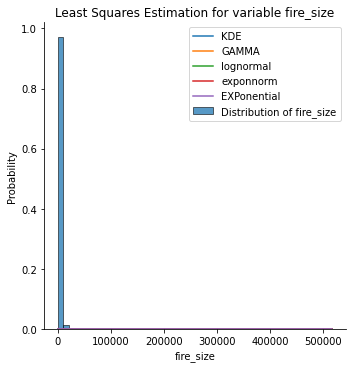

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.7910979811211571, pvalue=6.392001758506365e-34), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=8.403568496505232, pvalue=6.673195329653936e-11)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)


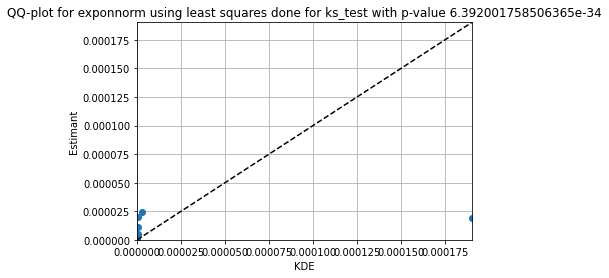

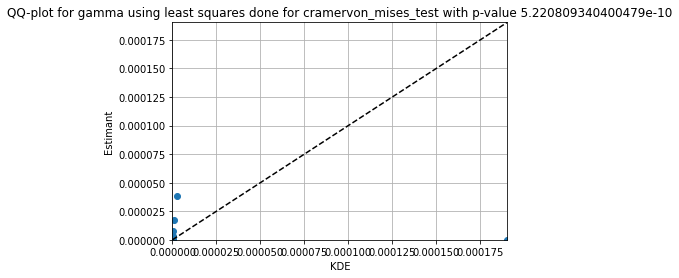

In [11]:
draw_ls_diagrams(df_sampled, x, s_c, property, kde_values, 50)

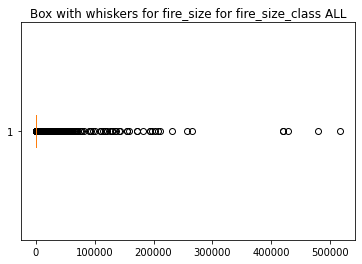

In [12]:
plt.boxplot(df_sampled[property], vert=False)
plt.title(f'Box with whiskers for {property} for fire_size_class {s_c}')
WHISKERS_FOLDER = './figures/whiskers/'
plt.savefig(f'{WHISKERS_FOLDER}whiskers_{property}_{s_c}.png')
plt.show()